## QUESTION 1
#### q 1.1


In [199]:
import numpy as np
def sample_uniform_then_gaus(num_samples):
    # Sampling uniform samples between 1 and 3, because the probability of sampling from each gaussian is uniform
    gaus_index=np.random.randint(1,4,size=num_samples)

    cov=np.eye(2)
    mu=[[-1,1],[-2.5,2.5],[-4.5,4.5]]
    # Sampling gaussian distribution samples using the respective mu-s and covariance matrices
    return [np.random.multivariate_normal(mu[i-1],cov) for i in gaus_index], gaus_index

train_size = 700
train_set, gaus_index_train = sample_uniform_then_gaus(train_size)


#### q 1.2


In [200]:
import matplotlib.pyplot as plt

def separate_different_dists(list_of_gaus, gaus_index):
    # Find the indices of each gaussian distribution points
    index_of_reds = np.where(np.array(gaus_index) == 1)[0]
    index_of_green = np.where(np.array(gaus_index) == 2)[0]
    index_of_blue = np.where(np.array(gaus_index) == 3)[0]
    # Creating lists of all points (x and y) taken from each gaussian distribution
    list_of_reds=np.array([list_of_gaus[i] for i in index_of_reds])
    list_of_green=np.array([list_of_gaus[i] for i in index_of_green])
    list_of_blue=np.array([list_of_gaus[i] for i in index_of_blue])
    return list_of_reds, list_of_green, list_of_blue

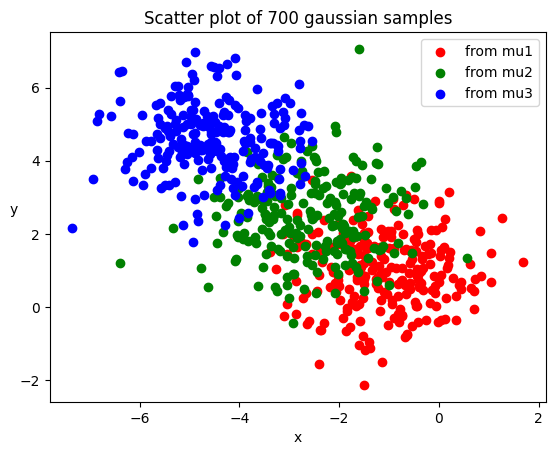

In [201]:
def gaus_scatter_plot(list_of_gaus, gaus_index, num_samples):
    reds, greens, blues = separate_different_dists(list_of_gaus, gaus_index)
    # Plotting the 3 gaussian distribution samples on one axes system
    fig, ax = plt.subplots()
    ax.scatter(reds[:,0], reds[:,1], c='red', label='from mu1')
    ax.scatter(greens[:,0], greens[:,1], c='green', label='from mu2')
    ax.scatter(blues[:,0], blues[:,1], c='blue', label='from mu3')
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.legend()
    plt.title('Scatter plot of '+str(num_samples)+' gaussian samples')
    plt.show()

gaus_scatter_plot(train_set, gaus_index_train, train_size)

#### q 1.3

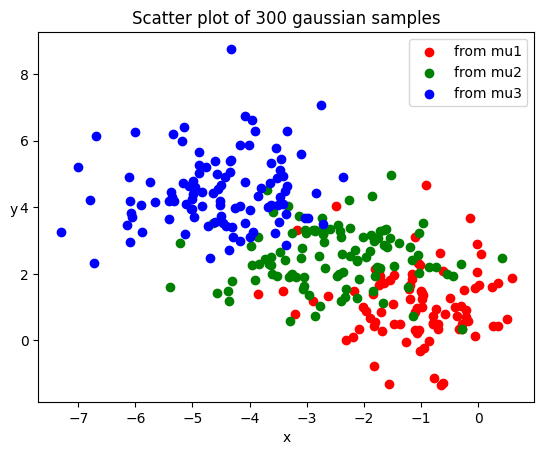

In [202]:
test_size = 300
test_set, gaus_index_test = sample_uniform_then_gaus(test_size)
gaus_scatter_plot(test_set, gaus_index_test, test_size)

#### q 1.4

In [203]:
def classification_err_rate(pred_labels, true_labels, sample_size):
    # Calculate the classification error rate according to the given function
    return np.sum(pred_labels != true_labels) / sample_size


In [204]:
from sklearn.neighbors import KNeighborsClassifier

def knn_to_error_rate_func(k, train_set, train_true_labels, test_set, test_true_labels):
    train_set = np.array(train_set)
    test_set = np.array(test_set)
    # Create a knn model object
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(train_set, train_true_labels)
    # Predict on train and test
    train_pred = knn.predict(train_set)
    test_pred = knn.predict(test_set)
    # return error rates on train and test
    return classification_err_rate(train_pred,train_true_labels, len(train_set)), classification_err_rate(test_pred, test_true_labels, len(test_set))

In [205]:
CER_train, CER_test = knn_to_error_rate_func(1, train_set, gaus_index_train, test_set, gaus_index_test)
print('The classification Error Rate of the train set for k='+str(1)+' is:',CER_train)
print('The classification Error Rate of the test set for k='+str(1)+' is:',CER_test)

The classification Error Rate of the train set for k=1 is: 0.0
The classification Error Rate of the test set for k=1 is: 0.20333333333333334


The train's error rate is 0 because for every sample in the train data, its 1 nearest neighbor is itself.
There is a gap between the train and test's classification error rates; in class we learned that when k=1 there exists an overfitting of the knn model, so that the train set has no prediction errors, while a test set with different samples than the train set, will have a much higher error rate.

#### q 1.5

In [206]:
# Calculate error rate for every k in the range of 1 to 20
list_of_errors=[]
for k in range(1, 21):
    list_of_errors.append(np.array(knn_to_error_rate_func(k, train_set, gaus_index_train, test_set, gaus_index_test)))
error_rates=np.array(list_of_errors)

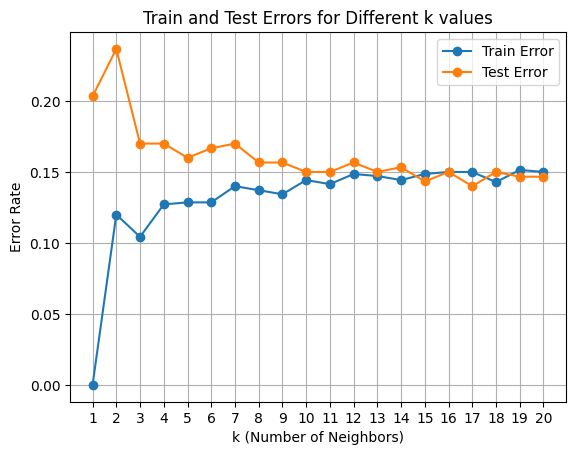

In [207]:
# Plot the train and test errors as a function of k
plt.plot(range(1, 21), error_rates[:,0], label='Train Error', marker='o')
plt.plot(range(1, 21), error_rates[:,1], label='Test Error', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors for Different k values')
plt.legend()
plt.xticks(np.arange(1, 21, step=1))
plt.grid()
plt.show()

As we can observe from the plot the test error rate tends to decrease with k, however it is not monotonically decreasing.

The test error does not always decrease with k, for example: suppose we have 100 samples and k is so large that it is closer to the number of the samples, suppose 100, the classification would have more miscalsifiied labels, almost 50 if the labels are of similar sample sizes, because it will classify the sample to the majority of the labels in the data. 


#### q 1.6

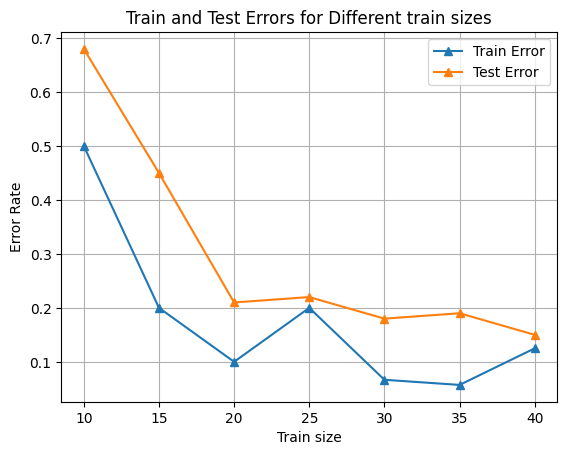

In [218]:
m_train=list(range(10,41,5))
k=10
m_test=100
test_set,true_test_labels = sample_uniform_then_gaus(m_test)
y_train = list()
y_test = list()
for size in m_train:
    train_set, true_train_labels=sample_uniform_then_gaus(size)
    CER_train, CER_test = knn_to_error_rate_func(10, train_set, true_train_labels, test_set, true_test_labels)
    y_train.append(CER_train)
    y_test.append(CER_test)

plt.plot(m_train, y_train, label='Train Error', marker='^')
plt.plot(m_train, y_test, label='Test Error', marker='^')
plt.xlabel('Train size')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors for Different train sizes')
plt.legend()
plt.xticks(np.arange(10,41,step=5))
plt.grid()
plt.show()


As the train size increases we excpect that the error rate will decrease, because we saw in class that a larger training set is more likely to be representative of the true distribution of the data. This makes the model more generalizable and it will capture the patterns in unseen data better. The number of k neighbors is fixed to be 10, so when the train size is 10 the classification of the samples would be as the label of the majority of the sample's labels. For instance, if the majority has the label 2, then all the samples will be classified with the label 2. Moreover we learned in lecture 1 that as the number of samples increases than the classification would be more accurate, when k is fixed. 

The result does not meet our full expectations because the graph is not monotonically decreasing as the train size grows. 

#### q 1.7
The line plots change between each trial because we took random samples of gaussian distributaion, so the samples are different between each run which leads to different classification in knn and changes the values of the error rates of the train and test with each run. It does not meet our full excpectaions beacause the graphs are not monotonically decreasing.

#### q 1.8
Instead of having each label predicted using the majority of the labels of its k nearest neighbors, we suggest a distance weighted function to calculate regression labels, as we saw in tutorial 1:

We define the function w(x,y)=1/p(x,y) when p is the euclidean distance between the point x and y, or another distance metric of your choise. Than for every test sample x, its predicted label will be the sum of every one of its k neighbors' labels, times the function w of x and the respective neighbor, divided by the sum of w(x,y) of all neighbors y in the neighbors of x.

This allows the nearest neighbor of a given sample have the biggest influence on the classification of the given sample and the rest of the neighbors influence less as they become farther from our sample.